In [4]:
import sklearn
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
weights = [87,81,82,92,90,61,86,66,69,69]
heights = [187,174,179,192,188,160,179,168,168,174]
print(len(weights))
print(len(heights))

10
10


In [8]:
body_df =pd.DataFrame({"height": heights, "weight":weights})
body_df.head()

,height,weight
0,187,87
1,174,81
2,179,82
3,192,92
4,188,90


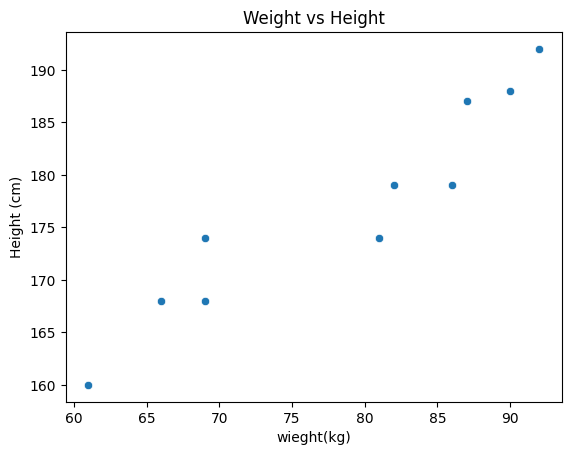

In [10]:
#두 변수 간 산점도
sns.scatterplot(data = body_df, x = 'weight', y = 'height')
plt.title('Weight vs Height')
plt.xlabel('wieght(kg)')
plt.ylabel('Height (cm)')
plt.show()

In [11]:
# 선형회귀 훈련(적합)
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
type(model_lr)

sklearn.linear_model._base.LinearRegression

In [14]:
#DataFrame[] : Series(데이터 프레임 컬럼)
#DataFram[[]] : DataFrame
x = body_df[['weight']]
y = body_df[['height']]

In [15]:
x.head(3)

,weight
0,87
1,81
2,82


In [16]:
# 데이터 훈련
model_lr.fit(x,y)

LinearRegression()

In [17]:
print(model_lr.coef_) #가중치 (w1)
print(model_lr.intercept_) #편향(bias ,wo)

[[0.86251245]]
[109.36527488]


In [20]:
w1 = model_lr.coef_[0][0]
w0 = model_lr.intercept_[0]

In [22]:
print('y = {}x + {}'.format(w1.round(2),w0.round(2)))

y = 0.86x + 109.37


- y(height) 는 x(몸무게)에 0.8을 곱한 뒤 109.37을 더하면 된다

---
---

- y = 0.86x + 109.37
- 활용하여 예측 컬럼을 추가
- 에러값을 각각 계산
- 양수를 만들기위해 제곱
- 모두 더할 예정(MSE)

In [23]:
body_df.head()

,height,weight
0,187,87
1,174,81
2,179,82
3,192,92
4,188,90


In [44]:
# 수동으로 에측값 만들기
body_df['pred'] = round(body_df['weight']*w1 + w0,3)
body_df.head()

,height,weight,pred,error,error^2
0,187,87,184.404,2.596,6.739216
1,174,81,179.229,-5.229,27.342441
2,179,82,180.091,-1.091,1.190281
3,192,92,188.716,3.284,10.784656
4,188,90,186.991,1.009,1.018081


In [45]:
# 에러
body_df['error'] = body_df['height'] - body_df['pred']
body_df.head()

,height,weight,pred,error,error^2
0,187,87,184.404,2.596,6.739216
1,174,81,179.229,-5.229,27.342441
2,179,82,180.091,-1.091,1.190281
3,192,92,188.716,3.284,10.784656
4,188,90,186.991,1.009,1.018081


In [46]:
#더하면 0이니까 제곱
body_df['error^2'] = body_df['error']* body_df['error']
body_df.head()

,height,weight,pred,error,error^2
0,187,87,184.404,2.596,6.739216
1,174,81,179.229,-5.229,27.342441
2,179,82,180.091,-1.091,1.190281
3,192,92,188.716,3.284,10.784656
4,188,90,186.991,1.009,1.018081


In [47]:
#MSE 계산 완료 10
body_df['error^2'].sum()/len(body_df)

np.float64(10.15297600000002)

- 산점도 그래프에  선형식 만들어서 그래프 그리기

<Axes: xlabel='weight', ylabel='height'>

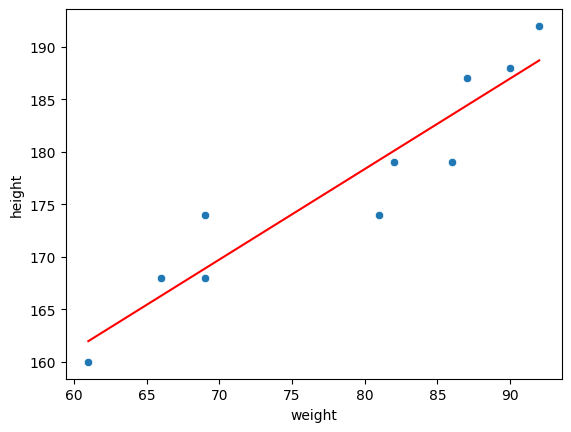

In [48]:
sns.scatterplot(data = body_df, x ='weight', y = 'height')
sns.lineplot(data = body_df, x ='weight', y = 'pred', color = 'red' )

- 선형회귀 모델 평가
  - 회귀 (숫자를 맞추는 방법) : MSE(수동계산은 10)
  - R Square 값이 : 평균 대비 설명력, 0이면 제일 낮음, 1일수록 높은 것.

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# 평가함수는 공통적으로 정답(실제 true), 예측값(pred)
y_true = body_df['height']
y_pred = body_df['pred']
mean_squared_error(y_true, y_pred)

np.float64(10.15297600000002)

In [51]:
r2_score(y_true, y_pred)

0.8899883410987104

In [52]:
# 예측
y_pred2 = model_lr.predict(body_df[['weight']])
y_pred2

array([[184.40385835],
       [179.22878362],
       [180.09129608],
       [188.71642061],
       [186.99139571],
       [161.97853455],
       [183.54134589],
       [166.29109682],
       [168.87863418],
       [168.87863418]])

In [43]:
mean_squared_error(y_true, y_pred2)

np.float64(10.152939045376318)

***
***


- seaborn 시각화 라이브러리는 기본적으로 데이터셋을 제공


In [55]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
# x : total_bill
# y : tip

In [59]:
model_lr2 = LinearRegression()
x = tips_df[['total_bill']]
y = tips_df[['tip']]
model_lr2.fit(x,y)

LinearRegression()

In [62]:
# y(tip) = w1*(total_bill) + w0
w1 = model_lr2.coef_[0][0]
w0 = model_lr2.intercept_[0]

In [65]:
print('y = {}x + {}'.format(w1.round(2),w0.round(2)))
# 전체 결제 금액이 1달러 오를 때 팁은 0.11 달러 추가된다.
# 전체 결제 금액이 92달러 오를 때 팁은 11 달러 추가된다.

y = 0.11x + 0.92


In [66]:
# 예측값 생성
y_true_tip = tips_df['tip']
y_pred_tip = model_lr2.predict(tips_df[['total_bill']])

In [67]:
y_true_tip[:4]

0    1.01
1    1.66
2    3.50
3    3.31
Name: tip, dtype: float64

In [68]:
y_pred_tip[:4]

array([[2.70463616],
       [2.00622312],
       [3.12683472],
       [3.40725019]])

In [ ]:
# 위 모델은 MES 가 10, 이번 건 1. 이 모델이 더 좋은건가요? 그렇지 않습니다
# x아 y의 단위가 달라요. 같은 데이터에서 다른 모델에 계속 쓰는거임.
mean_squared_error(y_true_tip,  y_pred_tip)

np.float64(1.036019442011377)

In [71]:
# 사회문화, 경제 같이 분야 따라 적정 기준치가 있다.
r2_score(y_true_tip,  y_pred_tip)

0.45661658635167646

In [76]:
tips_df['pred'] = y_pred_tip
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,pred
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


<Axes: xlabel='total_bill', ylabel='tip'>

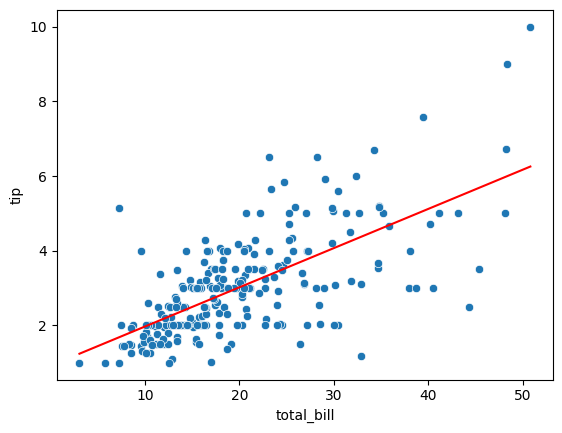

In [75]:
sns.scatterplot(data = tips_df , x = 'total_bill', y = 'tip')
sns.lineplot(data= tips_df, x = 'total_bill', y= 'pred',color='red')

- 선형회귀
  - 단순 선형회귀 : x 변수가 1개
  - 다중 선형회귀 : x 변수가 2개 이상

# 범주형 데이터 사용하기
- 함수를 쓸수도, sklean에서 제공하는 함수를 쓸 수도 있음(4단원)

In [77]:
tips_df.head(4)

,total_bill,tip,sex,smoker,day,time,size,pred
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250


In [88]:
# Male 1, Female 0
tips_df['sex_en'] = tips_df['sex'].apply(lambda x : 1 if x == 'Male' else 0 )
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,pred,sex_en
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,0
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,1
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,1
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0


In [89]:
# 모델 설계도 가져오기
# 학습
# 평가
model_lr3 = LinearRegression()
x = tips_df[['total_bill', 'sex_en']]
y = tips_df[['tip']]

In [90]:
x.head(3)

,total_bill,sex_en
0,16.99,0
1,10.34,1
2,21.01,1


In [91]:
y.head(3)

,tip
0,1.01
1,1.66
2,3.50


In [92]:
# 학습
model_lr3.fit(x,y)

LinearRegression()

In [94]:
# 에측
y_pred_tip2 = model_lr3.predict(x)
y_pred_tip2[:5]

array([[2.72117624],
       [1.99477235],
       [3.1176016 ],
       [3.39857199],
       [3.52094215]])

In [95]:
# 단순선형회귀 mse : x 변수가 전체 금액
# 다중선형회귀 mse : x 변수가 전체 금액, 성별
print('단순선형회귀', mean_squared_error(y_true_tip, y_pred_tip))
print('다중선형회귀', mean_squared_error(y_true_tip, y_pred_tip2))

단순선형회귀 1.036019442011377
다중선형회귀 1.0358604137213616


In [ ]:
#아주 미묘하게 증가.
print('단순선형회귀', r2_score(y_true_tip, y_pred_tip))
print('다중선형회귀', r2_score(y_true_tip, y_pred_tip2))

단순선형회귀 0.45661658635167646
다중선형회귀 0.45669999534149963


<Axes: xlabel='sex', ylabel='tip'>

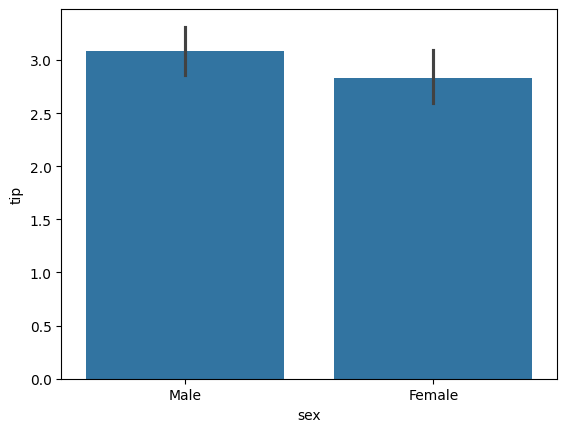

In [ ]:
# 성별에 따라서 값이 크게 차이 나는 것 같진 않다.
sns.barplot(data = tips_df, x = 'sex', y ='tip')